In [ ]:
import pandas as pd
import numpy as np

In [ ]:
inventory_dataset = pd.read_csv("inventory_dataset.csv")
peckinge_dataset = pd.read_csv("peckinge_dataset.csv")
inventory_dataset_with_robot= pd.read_csv("inventory_dataset_with_robot.csv")
peckinge_dataset_with_robot= pd.read_csv("peckinge_dataset_with_robot.csv")

# prepares la clasification des données

In [ ]:
def import_data(dataframe, classe):
  train_data = np.empty((0,69))
  train_classe = np.empty((0,1))
  for i in range(len(dataframe)):
    train_data=np.concatenate((train_data,dataframe.iloc[[i]]))
    train_classe=np.concatenate((train_classe,[[classe]]))
  return train_data, train_classe

In [ ]:
x_pecking_data, y_pecking_data = import_data(peckinge_dataset,1)
x_inventory_data, y_inventory_data = import_data(inventory_dataset,3)
x_peckinge_dataset_with_robot, y_peckinge_dataset_with_robot = import_data(peckinge_dataset_with_robot,2)
x_inventory_dataset_with_robot, y_inventory_dataset_with_robot = import_data(inventory_dataset_with_robot,4)

In [ ]:
X = np.concatenate((x_pecking_data,x_inventory_data,x_peckinge_dataset_with_robot,x_inventory_dataset_with_robot), axis = 0)
y = np.concatenate((y_pecking_data,y_inventory_data,y_peckinge_dataset_with_robot,y_inventory_dataset_with_robot), axis = 0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, confusion_matrix)
#fit the model with naive Bayes algorithm
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
#Prédire les données de test
y_pred_nb = model_nb.predict(X_test) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
model_svn = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model_svn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model_svn.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
def preprosess_data(dataframe):
  train_data = np.empty((0,69))
  for i in range(len(dataframe)):
    train_data=np.concatenate((train_data,dataframe.iloc[[i]]))
  return train_data

In [ ]:
def clasification(X):
  y_pred_nb = model_nb.predict(X)
  # Convert the predictions to a 1D array of class indices
  predictions = y_pred_nb.astype('int')
  # Get the class with the majority of occurrences
  majority_class = np.bincount(predictions).argmax()
  if(majority_class == 1):
    return "sorting and pecking"
  elif(majority_class == 2):
    return "sorting and pecking with robot" 
  elif(majority_class == 3):
    return "inventory checking" 
  elif(majority_class == 4):
    return "inventory checking with robot" 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualisier_resultat(y_test, y_pred):
  #Evaluer le modele : Matrice de confusion
  confusion_m= confusion_matrix(y_test, y_pred)
  sns.heatmap(confusion_m,  cmap='Blues', annot=True) 
  print("Matrice de confusion \n", confusion_m) #Evaluer le modele : Accuracy
  acc = accuracy_score(y_test,y_pred) 
  print("Accuracy : ",acc)
  #Precision
  precision = precision_score(y_test,y_pred, pos_label='positive',average='micro')
  print("precision : ",precision)
  #Rappel
  rappel = recall_score(y_test,y_pred,pos_label='positive',average='micro')
  print("Rappel : ",rappel)
  #F-mesure
  f_mesure=f1_score(y_test, y_pred, labels=None, pos_label=1, average='micro',sample_weight=None,zero_division='warn') 
  print("f_mesure : ",f_mesure) #Graphiquement K-means


Matrice de confusion 
 [[11053  1368   870  2016]
 [ 5246  3100   956  2689]
 [  471  2544  6582  5584]
 [  994  2033  4172  5909]]
Accuracy :  0.4793207044812636
precision :  0.4793207044812636
Rappel :  0.4793207044812636
f_mesure :  0.4793207044812636


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


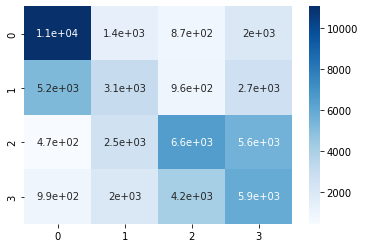

In [ ]:
visualisier_resultat(y_test, y_pred_nb)

In [ ]:
df_sorting = pd.read_excel("P006_006.xlsx")
df_inventory = pd.read_excel("P006_014.xlsx")
df_P7_13_inv = pd.read_excel("P007_013.xlsx")
df_P008_007_sort = pd.read_excel("P008_007.xlsx")
df_P56sr = pd.read_excel("P005_006.xlsx")
df_P57sr = pd.read_excel("P005_007.xlsx")
df_P514ir = pd.read_excel("P005_014.xlsx")

In [ ]:
# Normalization
def Normalization(df):

  List = list(df)
  for i in List:
    max = df[i].max()
    min = df[i].min()
    for j in range(len(df[i])):
      df[i].iloc[j] = (df[i].iloc[j]-min)/(max-min)
  return df

In [ ]:
df_sorting = Normalization(df_sorting)
df_inventory =Normalization(df_inventory)
df_P7_13_inv = Normalization(df_P7_13_inv)
df_P008_007_sort = Normalization(df_P008_007_sort)
df_P56sr = Normalization(df_P56sr)
df_P57sr = Normalization(df_P57sr)
df_P514ir = Normalization(df_P514ir)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
del df_sorting['Timestamp']
del df_inventory['Timestamp']
del df_P7_13_inv['Timestamp']
del df_P008_007_sort['Timestamp']
del df_P56sr['Timestamp']
del df_P57sr['Timestamp']
del df_P514ir['Timestamp']

In [ ]:
df_sorting = preprosess_data(df_sorting)
df_inventory =preprosess_data(df_inventory)
df_P7_13_inv = preprosess_data(df_P7_13_inv)
df_P008_007_sort = preprosess_data(df_P008_007_sort)
df_P56sr = preprosess_data(df_P56sr)
df_P57sr = preprosess_data(df_P57sr)
df_P514ir = preprosess_data(df_P514ir)

In [ ]:
print(clasification(df_sorting))
print(clasification(df_inventory))
print(clasification(df_P7_13_inv))
print(clasification(df_P008_007_sort))
print(clasification(df_P56sr))
print(clasification(df_P57sr))
print(clasification(df_P514ir))


sorting and pecking with robot
inventory checking with robot
inventory checking with robot
sorting and pecking
sorting and pecking
sorting and pecking with robot
inventory checking


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualisier(y_test, y_pred):
  #Evaluer le modele : Matrice de confusion
  confusion_m= confusion_matrix(y_test, y_pred) 
  sns.heatmap(confusion_m,  cmap='Blues', annot=True)
  print("Matrice de confusion \n", confusion_m) #Evaluer le modele : Accuracy
  acc = accuracy_score(y_test,y_pred) 
  print("Accuracy : ",acc)
  #Precision
  precision = precision_score(y_test,y_pred, pos_label='positive',average='micro')
  print("precision : ",precision)
  #Rappel
  rappel = recall_score(y_test,y_pred,pos_label='positive',average='micro')
  print("Rappel : ",rappel)
  #F-mesure
  f_mesure=f1_score(y_test, y_pred, labels=None, pos_label=1, average='micro',sample_weight=None,zero_division='warn') 
  print("f_mesure : ",f_mesure) #Graphiquement K-means

Matrice de confusion 
 [[15031   221    24    31]
 [  679 10978   172   162]
 [  120   205 14366   490]
 [  112    88   335 12573]]
Accuracy :  0.9525248709230576
precision :  0.9525248709230576
Rappel :  0.9525248709230576
f_mesure :  0.9525248709230576


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


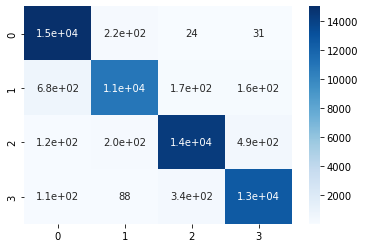

In [ ]:
visualisier_resultat(y_test, y_pred)

In [ ]:
def clasification_svn(X):
  y_pred_nb = model_svn.predict(X)
  # Convert the predictions to a 1D array of class indices
  predictions = y_pred_nb.astype('int')
  # Get the class with the majority of occurrences
  majority_class = np.bincount(predictions).argmax()
  if(majority_class == 1):
    return "sorting and pecking"
  elif(majority_class == 2):
    return "sorting and pecking with robot" 
  elif(majority_class == 3):
    return "inventory checking" 
  elif(majority_class == 4):
    return "inventory checking with robot" 

In [ ]:
print(clasification_svn(df_sorting))
print(clasification_svn(df_inventory))
print(clasification_svn(df_P7_13_inv))
print(clasification_svn(df_P008_007_sort))
print(clasification_svn(df_P56sr))
print(clasification_svn(df_P57sr))
print(clasification_svn(df_P514ir))


sorting and pecking
inventory checking with robot
inventory checking
sorting and pecking
inventory checking with robot
sorting and pecking with robot
sorting and pecking
